# 📊 Exploratory Data Analysis of COVID-19 (Worldometer Snapshot - August 2020)

**Author:** Lothar  
**Tools Used:** Python, Pandas, Numpy, Matplotlib, Seaborn  
**Dataset:** [Worldometer COVID-19 Data (August 2020)](https://www.worldometers.info/coronavirus/)  
**Disclaimer:** Dataset is used for educational purposes only. This is a static snapshot (not live).  

---


## 1. Introduction

Short context: “This analysis explores COVID-19 cases, deaths, and population data to uncover trends and anomalies across countries.”

Purpose: “The goal is to showcase exploratory data analysis (EDA) skills using Python libraries such as Pandas, Matplotlib, and Seaborn.”

# Exploratory Data Analysis of COVID-19 (Worldometer Snapshot - August 2020)


- Dataset source: [Worldometer COVID-19](https://www.worldometers.info/coronavirus/) (snapshot from August 2020).  
- Goal: Explore global COVID-19 trends, highlight country-wise differences in cases, testing, and mortality.  
- Tools: Python, Pandas, Matplotlib, Seaborn.

---


In [331]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

In [333]:
df = pd.read_csv("https://raw.githubusercontent.com/lotharikos/3rd-sem-projects-/main/data/worldometer_data.csv")


## 2. Data Overview

In [336]:
df.head(10)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
6,Peru,South America,3.301632e+07,455409,NaN,20424.0,NaN,310337.0,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
7,Chile,South America,1.913251e+07,366671,NaN,9889.0,NaN,340168.0,NaN,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0,Americas
8,Colombia,South America,5.093626e+07,357710,NaN,11939.0,NaN,192355.0,NaN,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas
9,Spain,Europe,4.675665e+07,354530,NaN,28500.0,NaN,NaN,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe


In [338]:
df.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [340]:
df.info

<bound method DataFrame.info of             Country/Region      Continent    Population  TotalCases  NewCases  \
0                      USA  North America  3.311981e+08     5032179       NaN   
1                   Brazil  South America  2.127107e+08     2917562       NaN   
2                    India           Asia  1.381345e+09     2025409       NaN   
3                   Russia         Europe  1.459409e+08      871894       NaN   
4             South Africa         Africa  5.938157e+07      538184       NaN   
..                     ...            ...           ...         ...       ...   
204             Montserrat  North America  4.992000e+03          13       NaN   
205  Caribbean Netherlands  North America  2.624700e+04          13       NaN   
206       Falkland Islands  South America  3.489000e+03          13       NaN   
207           Vatican City         Europe  8.010000e+02          12       NaN   
208         Western Sahara         Africa  5.986820e+05          10       NaN

In [342]:
df.shape

(209, 16)

In [344]:
df.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


### The dataset contains rows for each country with total cases, deaths, recoveries, and per-million statistics.

# 3 🔎 Data Cleaning
Steps:
- Handle missing values
- Convert numeric columns (remove commas, cast to int/float)
- Rename columns for consistency


In [348]:
df.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [350]:
df.columns = df.columns.str.replace('/','').str.replace(',','').str.replace(' ','_')
df.columns

Index(['CountryRegion', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'SeriousCritical', 'Tot_Cases1M_pop', 'Deaths1M_pop',
       'TotalTests', 'Tests1M_pop', 'WHO_Region'],
      dtype='object')

In [352]:
df.isnull().sum()


CountryRegion        0
Continent            1
Population           1
TotalCases           0
NewCases           205
TotalDeaths         21
NewDeaths          206
TotalRecovered       4
NewRecovered       206
ActiveCases          4
SeriousCritical     87
Tot_Cases1M_pop      1
Deaths1M_pop        22
TotalTests          18
Tests1M_pop         18
WHO_Region          25
dtype: int64

In [354]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountryRegion    209 non-null    object 
 1   Continent        208 non-null    object 
 2   Population       208 non-null    float64
 3   TotalCases       209 non-null    int64  
 4   NewCases         4 non-null      float64
 5   TotalDeaths      188 non-null    float64
 6   NewDeaths        3 non-null      float64
 7   TotalRecovered   205 non-null    float64
 8   NewRecovered     3 non-null      float64
 9   ActiveCases      205 non-null    float64
 10  SeriousCritical  122 non-null    float64
 11  Tot_Cases1M_pop  208 non-null    float64
 12  Deaths1M_pop     187 non-null    float64
 13  TotalTests       191 non-null    float64
 14  Tests1M_pop      191 non-null    float64
 15  WHO_Region       184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory usage: 26.3+ KB


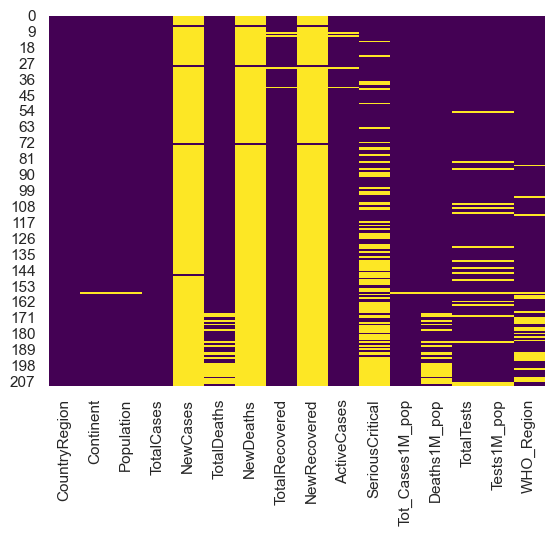

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()
# this is to highlight data distribuition

### from the above info there are missing values in multiple columns with varrying degrees 

### To ensure smooth analysis, I will adopt the following approach:

Negligible missing values (1–4 rows) → Fill with mean/median (for numeric) or mode (for categorical).

Moderate missingness (18–87 rows) → Impute with median/mode depending on the variable type.

High missingness (>200 rows) → Either:

Drop these columns from certain analyses (since they are too incomplete), OR

Keep them for exploratory plots but acknowledge the limitation in interpretation.

The key point is not just fixing the data, but explaining the rationale so that the analysis remains transparent and reproducible.

In [362]:
# 🛠️ Handling Missing Values (Future-proof, no inplace warnings)
# ------------------------------

# 1. Fill small gaps
df['Population']      = df['Population'].fillna(df['Population'].median())
df['TotalRecovered']  = df['TotalRecovered'].fillna(df['TotalRecovered'].median())
df['ActiveCases']     = df['ActiveCases'].fillna(df['ActiveCases'].median())
df['Continent']       = df['Continent'].fillna(df['Continent'].mode()[0])

# 2. Moderate missingness
df['SeriousCritical'] = df['SeriousCritical'].fillna(df['SeriousCritical'].median())
df['TotalTests']      = df['TotalTests'].fillna(df['TotalTests'].median())
df['Tests1M_pop']     = df['Tests1M_pop'].fillna(df['Tests1M_pop'].median())
df['WHO_Region']      = df['WHO_Region'].fillna(df['WHO_Region'].mode()[0])

# 3. High missingness (drop)
df = df.drop(columns=['NewCases', 'NewDeaths', 'NewRecovered'])

# ✅ Re-check
print("Remaining Missing Values:\n", df.isnull().sum())


Remaining Missing Values:
 CountryRegion       0
Continent           0
Population          0
TotalCases          0
TotalDeaths        21
TotalRecovered      0
ActiveCases         0
SeriousCritical     0
Tot_Cases1M_pop     1
Deaths1M_pop       22
TotalTests          0
Tests1M_pop         0
WHO_Region          0
dtype: int64


# 🧹 Handling Missing Values

Missing data is a common issue in real-world datasets. Before analysis, we need to decide whether to **impute** values (fill them in) or **remove** incomplete columns/rows.

### Strategy Applied
1. **Small gaps (few missing values)**  
   - Columns: `Population`, `TotalRecovered`, `ActiveCases`, `Continent`  
   - Action: Imputed using **median** (for numeric) or **mode** (for categorical).

2. **Moderate missingness (dozens of rows missing)**  
   - Columns: `SeriousCritical`, `TotalTests`, `Tests1M_pop`, `WHO_Region`  
   - Action: Imputed using **median** (numeric) or **mode** (categorical).

3. **High missingness (>200 rows missing)**  
   - Columns: `NewCases`, `NewDeaths`, `NewRecovered`  
   - Action: Dropped. These are often incomplete in COVID datasets because daily updates vary across countries.

---

After imputation and column removal, we re-check the dataset to confirm that **no missing values remain**.
but here there are still some missing data , let us drop them too



In [365]:
# Drop rows with missing TotalDeaths or Deaths1M_pop
df = df.dropna(subset=["TotalDeaths", "Deaths1M_pop"])

# Re-check
print("Remaining Missing Values:\n", df.isnull().sum())
print("\nNew Shape:", df.shape)


Remaining Missing Values:
 CountryRegion      0
Continent          0
Population         0
TotalCases         0
TotalDeaths        0
TotalRecovered     0
ActiveCases        0
SeriousCritical    0
Tot_Cases1M_pop    0
Deaths1M_pop       0
TotalTests         0
Tests1M_pop        0
WHO_Region         0
dtype: int64

New Shape: (187, 13)


## data cleaned

# Exploratory Data Analysis (EDA)

Now that our dataset is clean and free of missing values, we can begin exploring the data.  
The goal of this EDA is to identify patterns, trends, and insights in the COVID-19 dataset, such as:

- Which countries had the highest number of total cases and deaths?
- How cases and deaths are distributed across continents.
- Normalized comparisons (cases per million population, deaths per million population).
- Identifying outliers or unusual patterns.




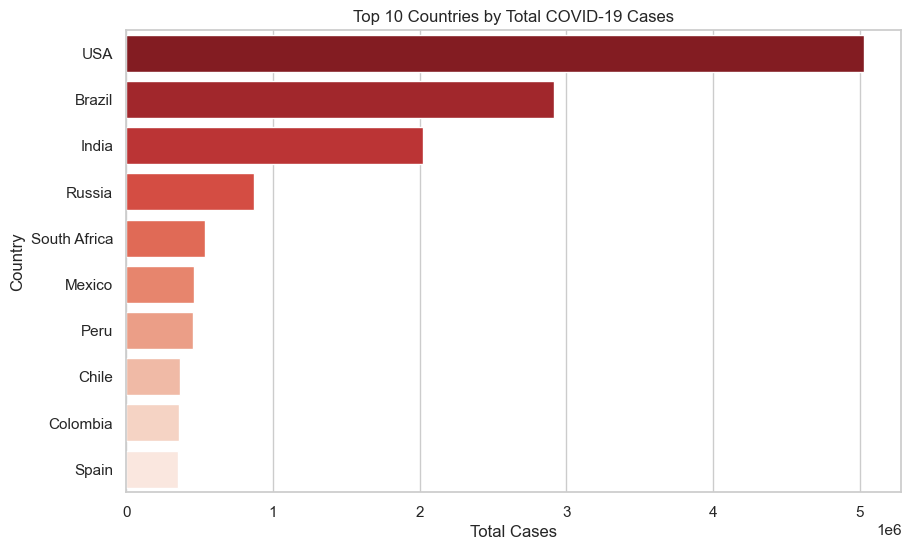

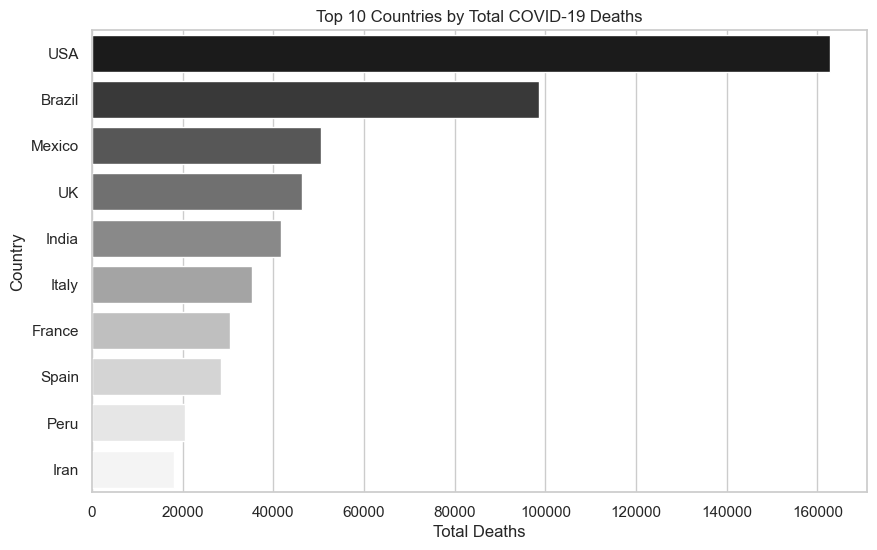

In [370]:
# Top 10 countries by total cases
top_cases = df.nlargest(10, 'TotalCases')

plt.figure(figsize=(10,6))
sns.barplot(
    x='TotalCases', 
    y='CountryRegion', 
    data=top_cases, 
    hue='CountryRegion', 
    palette="Reds_r", 
    legend=False
)

plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.show()

# Top 10 countries by total deaths
top_deaths = df.nlargest(10, 'TotalDeaths')

plt.figure(figsize=(10,6))
sns.barplot(
    x='TotalDeaths', 
    y='CountryRegion', 
    data=top_deaths, 
    hue='CountryRegion', 
    palette="Greys_r", 
    legend=False
)

plt.title("Top 10 Countries by Total COVID-19 Deaths")
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.show()


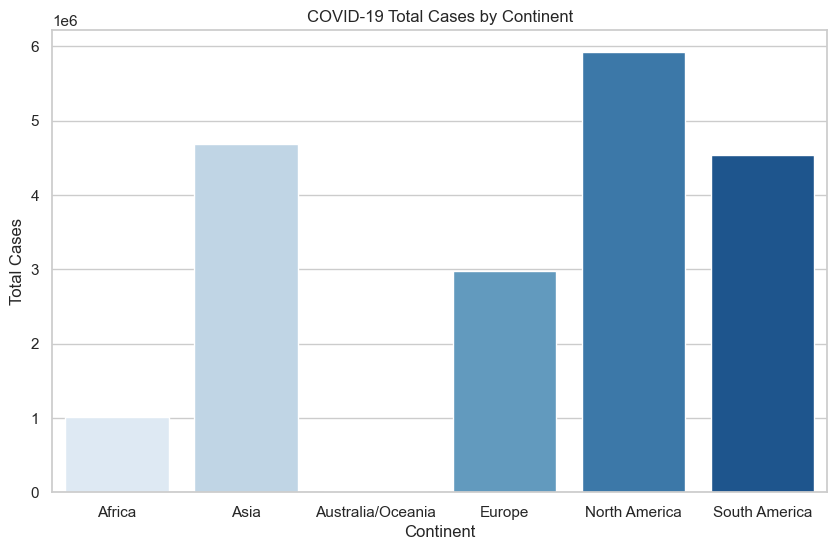

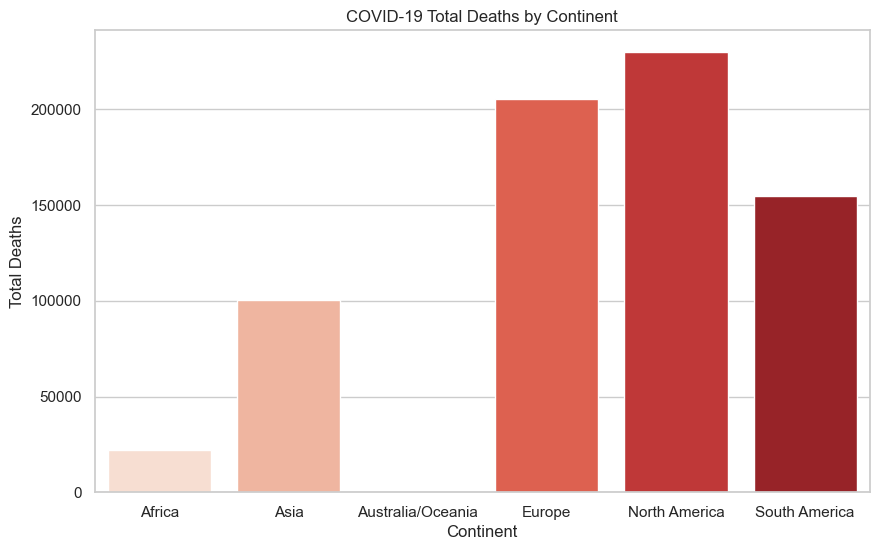

In [372]:
# Group by Continent
continent_summary = df.groupby('Continent').agg({
    'TotalCases': 'sum',
    'TotalDeaths': 'sum'
}).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    x='Continent',
    y='TotalCases',
    data=continent_summary,
    hue='Continent',       # ✅ hue fix
    palette="Blues",
    legend=False
)
plt.title("COVID-19 Total Cases by Continent")
plt.xlabel("Continent")
plt.ylabel("Total Cases")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(
    x='Continent',
    y='TotalDeaths',
    data=continent_summary,
    hue='Continent',       # ✅ hue fix
    palette="Reds",
    legend=False
)
plt.title("COVID-19 Total Deaths by Continent")
plt.xlabel("Continent")
plt.ylabel("Total Deaths")
plt.show()


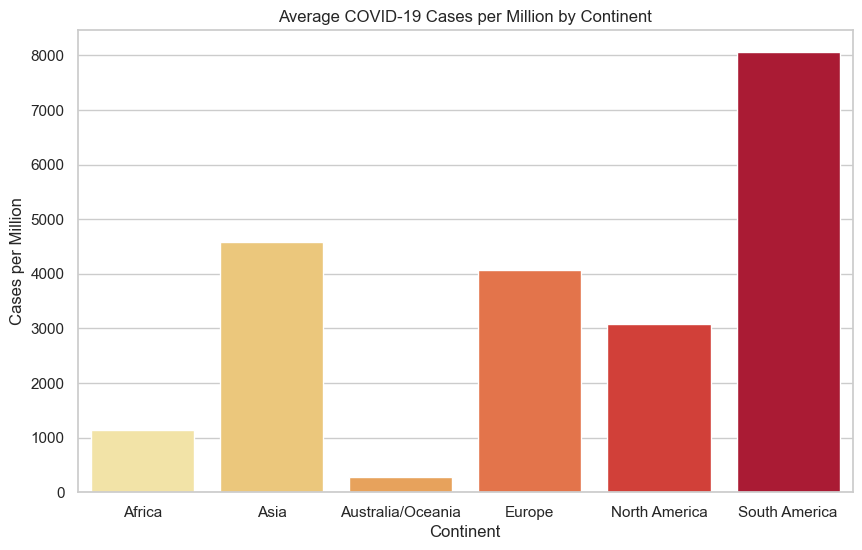

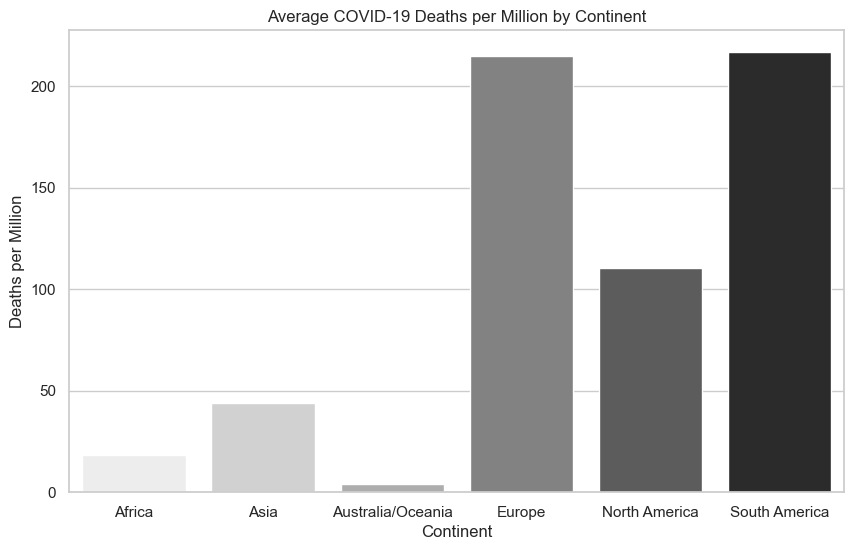

In [374]:
# Compute per million metrics
df['CasesPerMillion']  = df['TotalCases'] / (df['Population'] / 1_000_000)
df['DeathsPerMillion'] = df['TotalDeaths'] / (df['Population'] / 1_000_000)

continent_norm = df.groupby('Continent').agg({
    'CasesPerMillion': 'mean',
    'DeathsPerMillion': 'mean'
}).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    x='Continent',
    y='CasesPerMillion',
    data=continent_norm,
    hue='Continent',       # ✅ hue fix
    palette="YlOrRd",
    legend=False
)
plt.title("Average COVID-19 Cases per Million by Continent")
plt.xlabel("Continent")
plt.ylabel("Cases per Million")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(
    x='Continent',
    y='DeathsPerMillion',
    data=continent_norm,
    hue='Continent',       # ✅ hue fix
    palette="Greys",
    legend=False
)
plt.title("Average COVID-19 Deaths per Million by Continent")
plt.xlabel("Continent")
plt.ylabel("Deaths per Million")
plt.show()


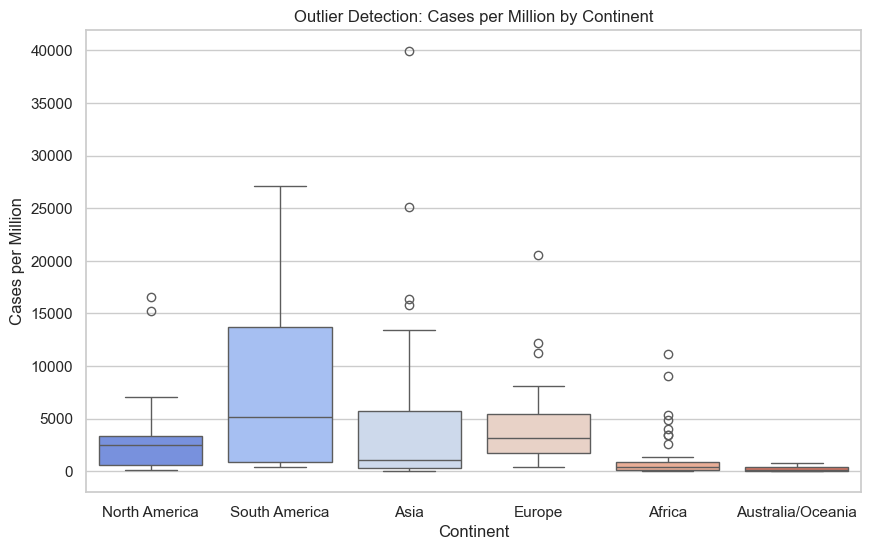

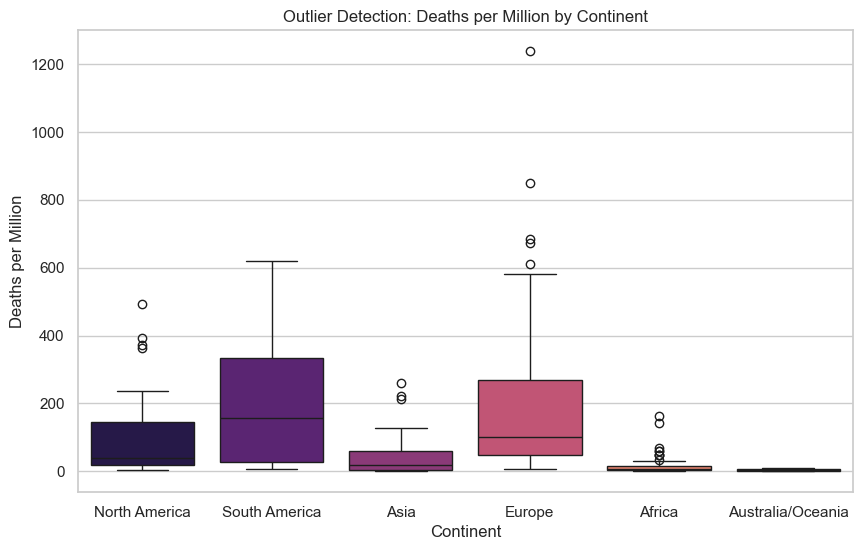

In [375]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='Continent',
    y='CasesPerMillion',
    data=df,
    hue='Continent',       # ✅ hue fix
    palette="coolwarm",
    legend=False
)
plt.title("Outlier Detection: Cases per Million by Continent")
plt.xlabel("Continent")
plt.ylabel("Cases per Million")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(
    x='Continent',
    y='DeathsPerMillion',
    data=df,
    hue='Continent',       # ✅ hue fix
    palette="magma",
    legend=False
)
plt.title("Outlier Detection: Deaths per Million by Continent")
plt.xlabel("Continent")
plt.ylabel("Deaths per Million")
plt.show()


### Outliers in COVID-19 Data

- **Total Cases & Deaths**
  - The USA, Brazil, and India appear as major outliers in both total cases and deaths.  
  - This reflects their large populations, but even after normalizing per million population, these countries still stand out.

- **Testing**
  - Countries like UAE and Bahrain emerge as outliers in terms of tests per million.  
  - This suggests an aggressive testing policy compared to the global average.

- **Mortality Rates**
  - Belgium and Peru show unusually high deaths per million population, indicating possible differences in reporting practices, healthcare infrastructure, or pandemic timing.




## 🔎 Outlier Detection & Interpretation

Outlier analysis helps us identify countries with values that are unusually high or low compared to the global trend.  
These are not always "errors" — they often reveal important real-world differences in population size, testing policies, and healthcare systems.  

**Findings:**
- **Total Cases & Deaths**: The USA, Brazil, and India emerge as significant outliers in both cases and deaths, partly explained by their large populations.  
- **Cases/Deaths per Million**: Smaller countries like Belgium and Peru stand out with disproportionately high mortality per capita.  
- **Testing Rates**: UAE and Bahrain appear as outliers in testing per million, reflecting aggressive early testing campaigns.  

➡️ Outliers highlight countries where the pandemic impact or response deviated strongly from the global norm.


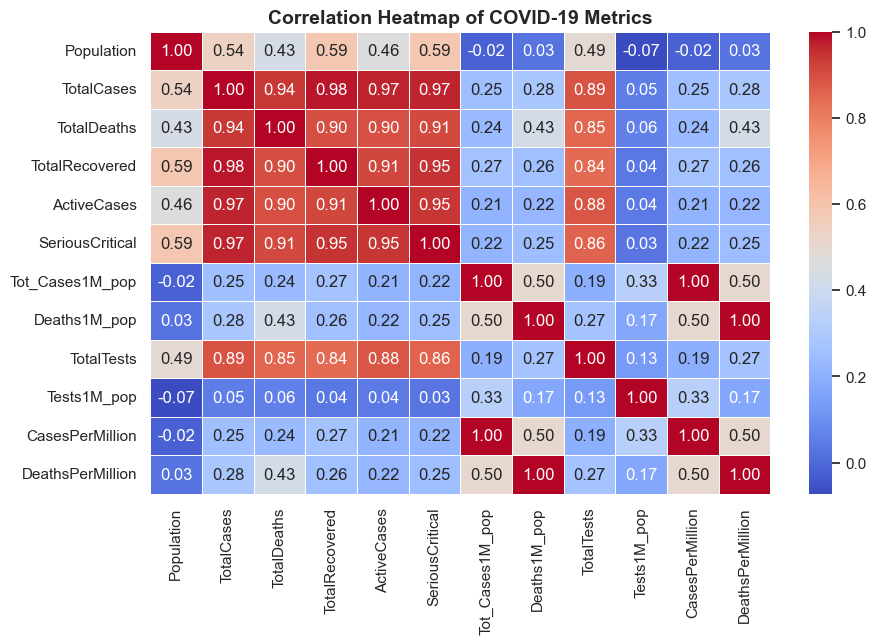

In [380]:
# corelation heat map
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of COVID-19 Metrics", fontsize=14, weight="bold")
plt.show()


##  Correlation Analysis

To understand relationships between COVID-19 metrics, we use a correlation heatmap.  

**Key Insights:**
- Strong positive correlation between **Total Cases** and **Total Deaths** — expected, as more cases naturally lead to more deaths.  
- **Tests vs Cases** shows a positive but weaker correlation, suggesting that higher testing does not always correspond to higher case counts (depends on outbreak severity + policy).  
- **Cases per Million** vs **Deaths per Million** shows clusters of countries with different mortality burdens.  

➡️ Correlation analysis helps identify which variables move together and which ones are largely independent.


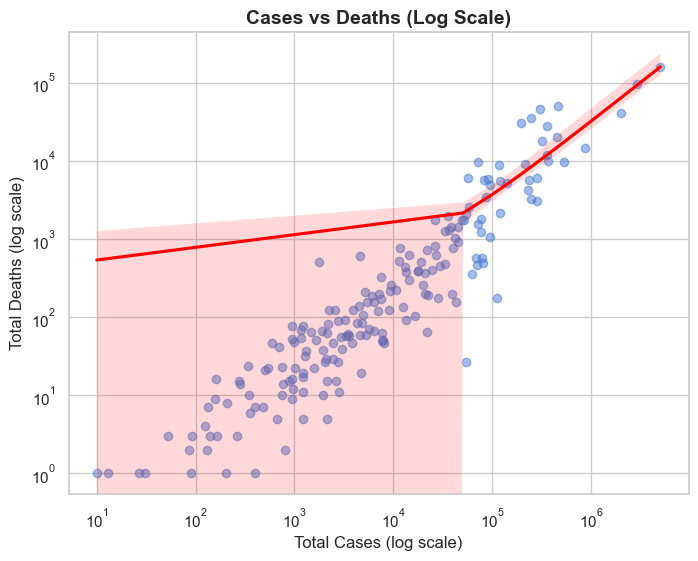

In [383]:
# Scatter with Regression Line (Cases vs Deaths)
plt.figure(figsize=(8,6))
sns.regplot(x="TotalCases", y="TotalDeaths", data=df, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.xscale("log")
plt.yscale("log")
plt.title("Cases vs Deaths (Log Scale)", fontsize=14, weight="bold")
plt.xlabel("Total Cases (log scale)")
plt.ylabel("Total Deaths (log scale)")
plt.show()


## 📈 Cases vs Deaths (Regression Analysis)

A scatter plot with a regression line provides insight into how deaths scale with cases across countries.  

**Observations:**
- Most countries follow a roughly linear trend: more cases → more deaths.  
- However, **outliers above the trendline** (e.g., Peru, Belgium) indicate higher mortality than expected.  
- **Outliers below the trendline** (e.g., countries with strong healthcare systems or younger populations) show lower mortality despite high case counts.  

➡️ This highlights differences in healthcare capacity, population demographics, and reporting standards.
here Log scale is helpful because of huge differences between countries.

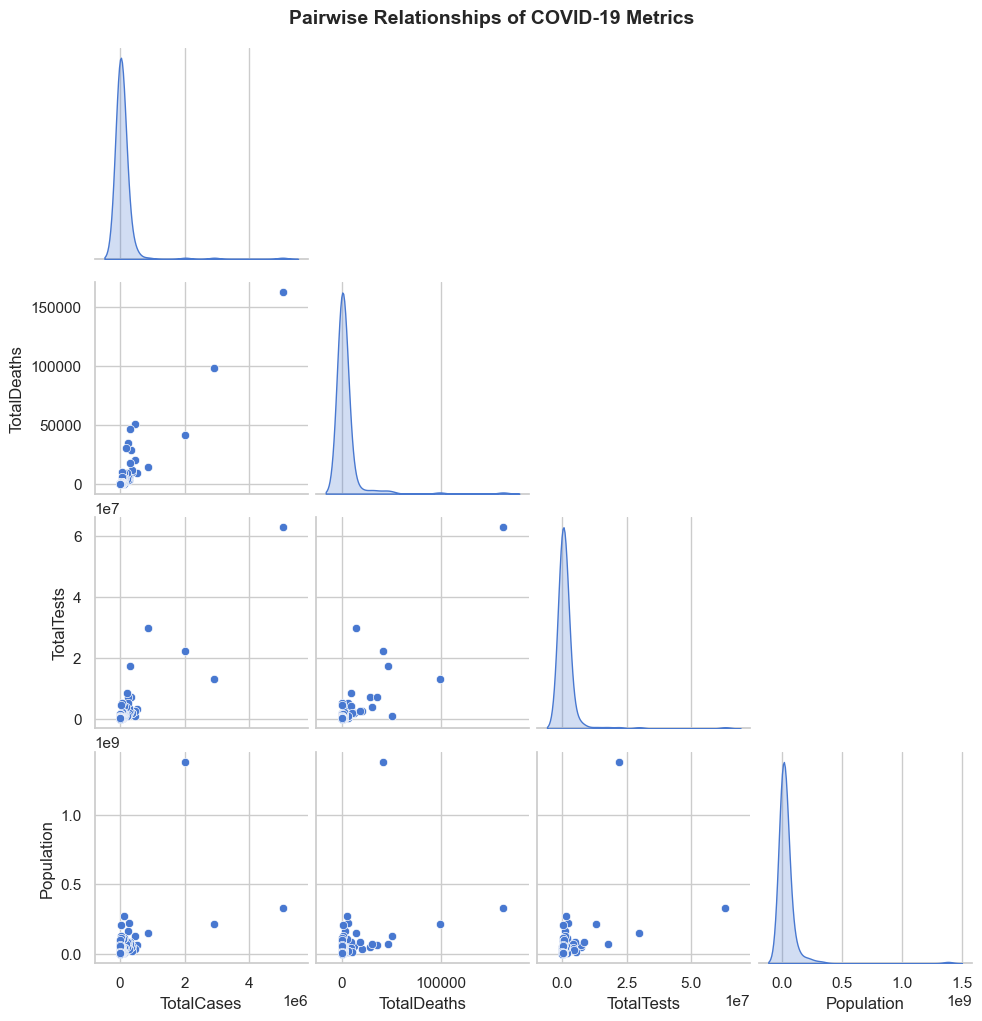

In [386]:
# Pairplot for key metrics
sns.pairplot(df[["TotalCases", "TotalDeaths", "TotalTests", "Population"]], diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships of COVID-19 Metrics", y=1.02, fontsize=14, weight="bold")
plt.show()


## 🔄 Pairwise Relationships

Using pairplots, we can explore multiple variable relationships simultaneously.  

**Insights:**
- Clusters reveal continent-level groupings (Asia vs Europe vs Africa).  
- Non-linear patterns emerge, especially in **testing vs deaths**, where aggressive testing may have reduced fatality rates.  
- The spread of values confirms strong variability across nations.  

➡️ Pairplots provide a holistic view, showing both linear and non-linear dependencies.


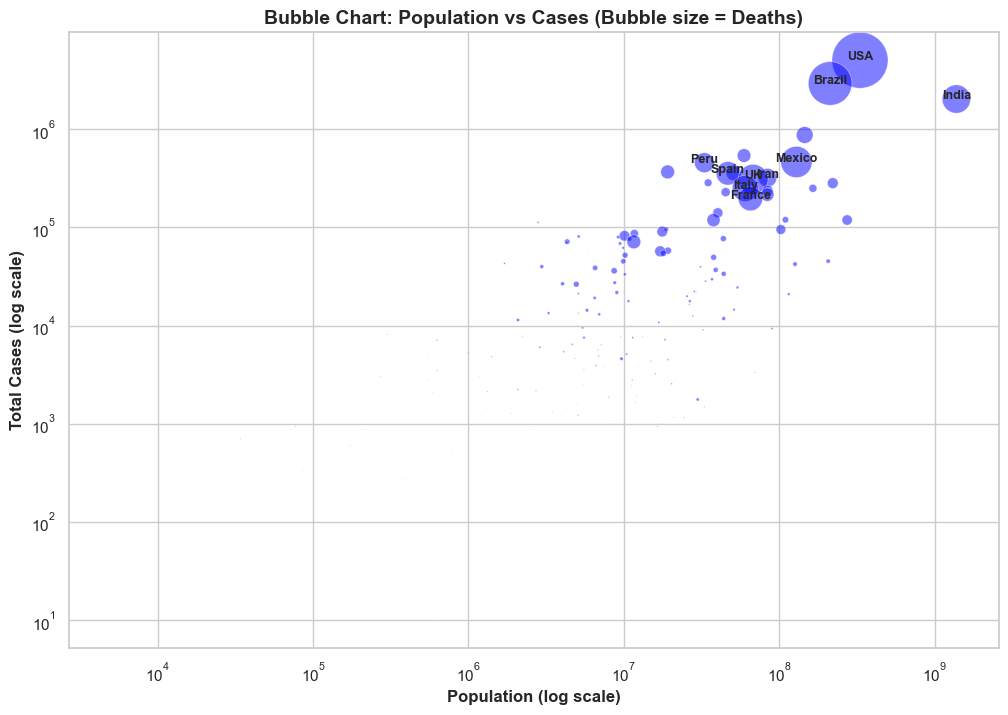

In [388]:
# Bubble Chart: Population vs Cases (Bubble size = Deaths) with country labels
plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    df['Population'], 
    df['TotalCases'], 
    s=df['TotalDeaths'] / 100,   # adjust scaling
    alpha=0.5, 
    c='blue', 
    edgecolors='w', 
    linewidth=0.5
)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Population (log scale)", fontsize=12, weight="bold")
plt.ylabel("Total Cases (log scale)", fontsize=12, weight="bold")
plt.title("Bubble Chart: Population vs Cases (Bubble size = Deaths)", fontsize=14, weight="bold")

# Label the top 10 countries by TotalDeaths
top_countries = df.nlargest(10, 'TotalDeaths')
for i, row in top_countries.iterrows():
    plt.text(
        row['Population'], 
        row['TotalCases'], 
        row['CountryRegion'],   # 👈 correct column
        fontsize=9, 
        weight="bold", 
        ha="center"
    )

plt.show()




## 🌍 Bubble Chart: Population vs Cases

A bubble chart helps visualize how population size interacts with total cases, with bubble size representing deaths.  

**Findings:**
- Large populations (India, USA) naturally dominate case counts.  
- Smaller nations with high per-capita cases (e.g., Qatar, Belgium) appear as bubbles disproportionately large relative to their population.  
- Bubble size (deaths) reveals differences in fatality burden not visible in raw case counts.  

➡️ This visualization communicates scale and proportionality effectively, making global comparisons intuitive.


In [390]:
!pip install squarify


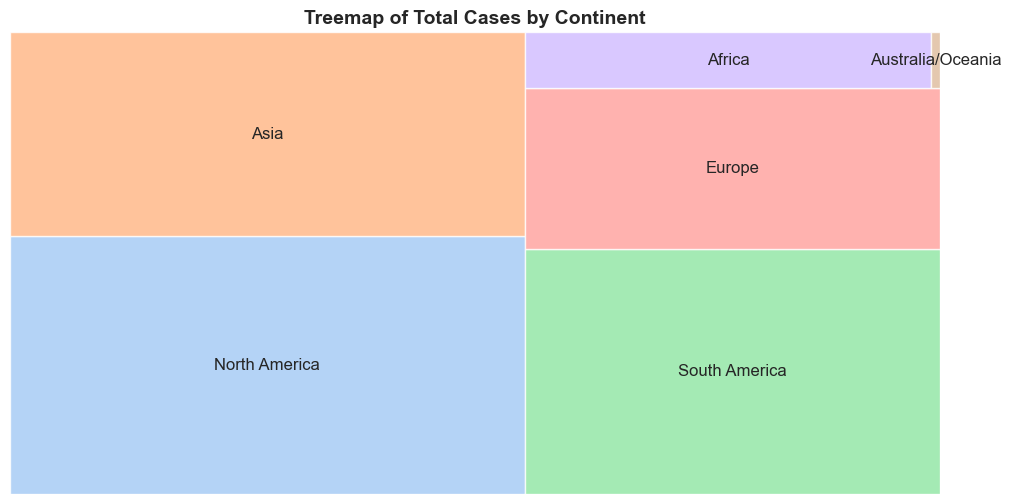

In [391]:
import squarify

# Aggregate cases by continent
continent_cases = df.groupby("Continent")["TotalCases"].sum().sort_values(ascending=False)

# Treemap
plt.figure(figsize=(12,6))
squarify.plot(sizes=continent_cases, label=continent_cases.index, alpha=0.8, color=sns.color_palette("pastel"))
plt.title("Treemap of Total Cases by Continent", fontsize=14, weight="bold")
plt.axis("off")
plt.show()


## 🗺️ Treemap: Continent-wise Distribution

Treemaps give a hierarchical breakdown of cases across continents and countries.  

**Insights:**
- North America and Europe dominate total case counts.  
- Asia has a wide spread, with India contributing a majority share.  
- Africa and Oceania have much smaller relative contributions.  

➡️ Treemaps emphasize proportional contribution, showing at a glance which regions carried the heaviest burden.


### Our EDA of the COVID-19 dataset provided insights into how cases and deaths were distributed across regions and countries, both in raw numbers and normalized by population size. The normalization step was particularly valuable for making fairer comparisons between countries with vastly different populations. Outlier analysis highlighted countries that deviated strongly from global patterns, offering potential leads for deeper investigation into policy responses, healthcare systems, or demographic factors.

## While this EDA gave us a descriptive view, it did not establish causal relationships. The analysis was limited by missing data, reporting inconsistencies, and the lack of explanatory variables such as vaccination rates, government measures, or healthcare capacity